# Edge Detection

## (1) Basic Idea
Look for a neighborhood with strong signs of change.

<img src="images/5/edge_detection.png" width="400px">

This changes  is about derivatives.

#### 1) Derivatives and edges
An edge is a place of rapid change in the image intensity function.

<img src="images/5/derivatives_edges.png" width="500px">

Those peack in the first derivative are related to maximum positive and maximum negative. So, __finding edges is going to have something to do with fiding peaks in the derivative.__

#### 2) Differential Operators
- It returns some derivative when applied to the image.
- Model these "operators" as masks/kernels that compute the image gradient function.
- Threshold this gradient function to select the edge pixels.

#### 3) What's gradient?
- The gradient is the vector that's made up of the partial derivatives.
- The gradient points in the direction of most rapid increase in intensity.
- The magnitude of that vector is how much it's changing as a function of a unit step in that direction.
$$
\nabla f = \big[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \big]
$$

For example, 

- below picture is only changing in the $x$ direction. So, its gradient would be whatever the change is in the $x$ direction and $0$ in the $y$ direction.

<img src="images/5/gradient_x.png" width="200px">

$$
\nabla f = \big[\frac{\partial f}{\partial x}, 0 \big]
$$

- Likewise, below image only changes in the $y$ direction.

<img src="images/5/gradient_y.png" width="150px">

$$
\nabla f = \big[0, \frac{\partial f}{\partial y} \big]
$$

- Of course, there are changes in both directions.
<img src="images/5/gradient_xy.png" width="150px">

$$
\nabla f = \big[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \big]
$$

#### 4) Image gradient
- The gradient of an image:
$$
\nabla f = \big[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \big]
$$

- The gradient direction:
$$
\theta = \tan^{-1}\big(\frac{\partial f}{\partial x}\, / \, \frac{\partial f}{\partial y}\big)
$$

- The amount of change given by the gradient magnitude:
$$
||\nabla||= \sqrt{\big(\frac{\partial f}{\partial x}\big)^2 + \big(\frac{\partial f}{\partial y}\big)^2}
$$

#### 5) Discrete gradient
For 2D function (continuous), $f(x,y)$, the partial derivative is:

$$
\frac{\partial f(x,y)}{\partial x}=\lim_{\epsilon \rightarrow x}
= \frac{f(x+\epsilon,y)-f(x,y)}{\epsilon}
$$

For discrete data, we can approximate using finite differences:

$$
\frac{\partial f(x,y)}{\partial x} \approx
\frac{f(x+1,y)-f(x,y)}{1}
\approx f(x+1,y)-f(x,y)
$$

, which takes 1 step.

Image derivatives can be computed by using small convolution filters of size 2 x 2 or 3 x 3, such as the Laplacian, Sobel, Roberts and Prewitt operators. An __operator__ (mask/kernel) can be applied to the image that implements.
<img src="images/5/partial_result.png" width="500px">
<img src="images/5/kernel.png" width="500px">

Then, the result looks like this.

#### 6) Well-known gradients masks
<img src="images/5/gradient_masks.png" width="350px">

## code

#### 1) Sobel:
```python
Python: cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) → dst
```

Parameters:	
- __src:__ input image.
- __dst:__ output image of the same size and the same number of channels as src .
- __ddepth:__ output image depth; the following combinations of src.depth() and ddepth are supported,
    - src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
    - src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
    - src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
    - src.depth() = CV_64F, ddepth = -1/CV_64F
    
    , when ddepth=-1, the destination image will have the same depth as the source; in the case of 8-bit input images it will result in truncated derivatives.

- __xorder:__ order of the derivative x.
- __yorder:__ order of the derivative y.
- __ksize:__ size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
- __scale:__ optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels() for details).
- __delta:__ optional delta value that is added to the results prior to storing them in dst.
- __borderType:__ pixel extrapolation method (see borderInterpolate() for details).

#### 2) cartToPolar: 
Calculates the magnitude and angle of 2D vectors.
```python
Python: cv2.cartToPolar(x, y[, magnitude[, angle[, angleInDegrees]]]) → magnitude, angle
```

Parameters:	
- __x:__ array of x-coordinates; this must be a single-precision or double-precision floating-point array.
- __y:__ array of y-coordinates, that must have the same size and same type as x.
- __magnitude:__ output array of magnitudes of the same size and type as x.
- __angle:__ output array of angles that has the same size and type as x; the angles are measured in radians (from 0 to 2*Pi) or in degrees (0 to 360 degrees).
- __angleInDegrees:__ a flag, indicating whether the angles are measured in radians (which is by default), or in degrees.
- __angle_in_degrees:__ a flag, indicating whether the angles are measured in radians, or in degrees (specific to C syntax).

The function calculates either the magnitude, angle, or both for every 2D vector (x(I),y(I)):

$$
\begin{array}{l} \texttt{magnitude} (I)= \sqrt{\texttt{x}(I)^2+\texttt{y}(I)^2} , \\ \texttt{angle} (I)= \texttt{atan2} ( \texttt{y} (I), \texttt{x} (I))[ \cdot180 / \pi ] \end{array}
$$

The angles are calculated with accuracy about 0.3 degrees. For the point (0,0), the angle is set to 0.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('images/5/octagon.png',cv2.IMREAD_GRAYSCALE) # Gray scale

def select_gdir(g_magnitude, g_direction, min_magnitude, min_dir, max_dir):
    [r, c] = g_magnitude.shape
    selected_angle = np.zeros(g_magnitude.shape)
    
    selected_angle = selected_angle.reshape(-1)
    g_magnitude = g_magnitude.reshape(-1)
    g_direction = g_direction.reshape(-1)
    
    for i in range(len(g_direction)):
        if g_magnitude[i] >= min_magnitude and min_dir <= g_direction[i] <= max_dir:
            selected_angle[i] = 1

    selected_angle = selected_angle.reshape(r, c)
    return g_magnitude, selected_angle

grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # with respect to x
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # with respect to y
grad_magnitude, grad_angle = cv2.cartToPolar(grad_x, grad_y, angleInDegrees=True)
s_mag, s_ang = select_gdir(grad_magnitude, grad_angle, 100, 60, 120)

fig, axis = plt.subplots(3, 2, figsize=(10, 10))
axis[0][0].imshow(img, cmap="gray")
axis[0][0].set_title('Origin')
axis[0][0].set_xticks([]), axis[0][0].set_yticks([])

axis[0][1].imshow(grad_x, cmap="gray")
axis[0][1].set_title('Gradient x')
axis[0][1].set_xticks([]), axis[0][1].set_yticks([])

axis[1][0].imshow(grad_y, cmap="gray")
axis[1][0].set_title('Gradient y')
axis[1][0].set_xticks([]), axis[1][0].set_yticks([])

axis[1][1].imshow(grad_magnitude, cmap="gray")
axis[1][1].set_title('Magnitude')
axis[1][1].set_xticks([]), axis[1][1].set_yticks([])

axis[2][0].imshow(grad_angle, cmap="gray")
axis[2][0].set_title('Angles')
axis[2][0].set_xticks([]), axis[2][0].set_yticks([])

axis[2][1].imshow(s_ang, cmap="gray")
axis[2][1].set_title('Selected Angles')
axis[2][1].set_xticks([]), axis[2][1].set_yticks([])

ImportError: No module named 'cv2'

## (2) In the Real World

In the real world, if the gradient of that function is just taken, it's hard to say the exact location of such a changing location in the derivative information, because there will be noise. So, the effect of noise on some of the derivatives make worse the edge detection in the real world.

<img src="images/5/just_noise.png" width="500px">

#### 1) Finite differences responding to noise
If I add noise to the image, the gradient starts to fall apart.

<img src="images/5/effect_noise.png" width="500px">

So, those noises have to be handled, using filtering, smoothing in order to get rid of that. 

#### 2) Smooth first
When we apply a smoothing kernel, $h$, on the image, we get the $h$ convolved image, $h*f$ (nice smooth function in gragh). Then we can take the derivative and it will give a nice and smooth peak. So, the edge is the peak location in the last graph. 
<img src="images/5/smooth_first.png" width="500px">

Basically, in order to find edges, we are going to have to apply smooth gradients somehow and look for some peaks.

#### 3) Derivative theorem of convolution.
We can save an operation, because the derivative of $h*f$ is the same as the derivative of $h$ convovled with $f$.

<img src="images/5/convolution.png" width="500px">

That will saves us an operation, because we can just take a filter and apply it and no more derivatives have to be done. 

#### 4) Find a Peak (Maximun of derivative)
Taking more derivatives enables finding maxima. So now, instead of just doing a single derivative, let's take a second derivative. 

<img src="images/5/second_derivative.png" width="500px">

After applying second derivative filter on the image, we get the zero crossing with the strong slope. And that's what corresponds to the edge. And in this idea of a stong slope zero crossing, we don't have to find general maxima. We just have to find any place where __the value is zero and that nearby has a strong gradient.__

# Canny Edge Detection

## (1) Gaussian Filter 2D

#### 1) Derivative of Gaussian
It is preferable to apply $h$ to the smoothing function $g$ and apply the result to the image, sice $h$ is typically smaller and so it's faster. In addition, The smoothed derivative operator is computed once and it can be used repeatedly.

<img src="images/5/Gaussian2D.png" width="400px">

$h_x$ is derivative in terms of variables, and $g$ is Gaussian kernel.

<img src="images/5/Gaussian_derivative.png" width="400px">

#### 2) How big a Gaussian should we use?

<img src="images/5/Gaussian_Smooth.png" width="400px">

Effect of $\sigma$ on derivatives is as below,

<img src="images/5/Gaussian_effect.png" width="400px">

Changing the sigma (the size of the Gaussian) will enhance the magnitudes of these derivatives as a function of sort of how quickly the image varies over space.

## (2) Canny edge operator

#### 1) Find edges...
Fundamentally, It's a multi-step process.
1. Smoothing derivatives to suppress noise and compute gradient.
2. Threshold to find regions of __significant gradient.__
3. Thin to get localized edge pixels.
4. Link or connect edge pixels.

#### 2) Canny edge operator
From the original image,
<img src="images/5/Lana_origin.png" width="200px">
1. Filter image with derivative of Gaussian.
2. Find magnitude and orientation of gradient.
<img src="images/5/Lena_magnitude.png" width="200px">
3. Non-maximum suppression: 
    - Thin multi-pixel wide "rideges" down to single pixel width.
<img src="images/5/Lena_suppression.png" width="200px">
4. Linking and thresholding (hysteresis):
    - Define two thresholds: low and high
    - Use the high threshold to start edge curves and the low threshold to continue them.
<img src="images/5/Lena_thinning.png" width="200px">

#### 3) The reason of using thinning

There is some kind of thick part that exceeds the threshold, and it would like to say is that there's an edge running through the middle.

And taking the derivative of that will be above the threshold. So that gives this thick edge. And it needs to be turned into thin edge.

<img src="images/5/Lena_threshold.png" width="500px">

#### 4) Non-maximal suppression

Basically it finds areas of high gradient, and it looks across in the direction of the gradient, and it finds just the peak there.

<img src="images/5/Non-matimal.png" width="500px">

#### 5) The Canny edge detector.

The pixels under the chin seem not to survive at the thresholding. It's a problem because it can be said that we had too high a threshold. But in contrary, if the threshold is too low, then a whold bunch of stuff is going to show up.

<img src="images/5/canny_threshold.png" width="500px">

__The question is how to deal with that?__

1. Apply a high threshold to detect strong edge pixels.
2. Link those strong edge pixels to form strong edges.
3. Apply a low threshold to find weak but plausible edge pixels.
4. Extend the strong edge to follow weak edge pixels.

And $\sigma$ of Gaussian kernel for smoothing also can affect the result of canny edge detector.

<img src="images/5/Effect_sigma.png" width="500px">

## (3) Single 2D Edge Detection Filter

In two dimension, it is a harder to find edges in zero-crossings. The reason is there's more than one direction to take the derivative.

<img src="images/5/2DGaussian_derivative.png" width="500px">

For the second derivatives, there would be three choices. 
1. The parial of $x$ can be taken again, so that's a partial of $f$ squared is partial of $x$ twice. 
2. The partial of $y$, twice.
3. The partial of $f$ with respect to $y$ 

So, the use of Laplacian of Gaussian can resolve this issue. It will give the Maxian hat operator symmetrically.

<img src="images/5/Maxican_hat.png" width="500px">

And then, zero-crossing can be found!

## Code

```python
Python: cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) → edges¶
```

Parameters:	
- __image:__ single-channel 8-bit input image.
- __edges:__ output edge map; it has the same size and type as image .
- __threshold1:__ first threshold for the hysteresis procedure.
- __threshold2:__ second threshold for the hysteresis procedure.
- __apertureSize:__ aperture size for the Sobel() operator.
- __L2gradient:__ a flag, indicating whether a more accurate  $L_2$ norm $=\sqrt{(dI/dx)^2 + (dI/dy)^2}$ should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default  $L_1$ norm  $=|dI/dx|+|dI/dy|$ is enough ( L2gradient=false ).

The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges.

[]

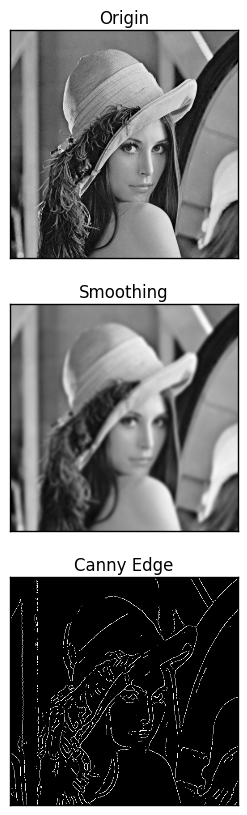

In [95]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Road image
img = cv2.imread('images/5/Lenna.png', 
                 cv2.IMREAD_GRAYSCALE) # Gray scale

## Gaussian filter
filter_size = 15
filter_sigma = 3
gaussian_filter = np.dot(cv2.getGaussianKernel(filter_size, 
                                               filter_sigma, 
                                               cv2.CV_64F),
                        (cv2.getGaussianKernel(filter_size, 
                                               filter_sigma, 
                                               cv2.CV_64F)).T)

img_filtered = cv2.filter2D(img, -1, 
                            gaussian_filter, 
                            borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

## Canny edge detection
# edges = cv2.Canny(img_filtered, 20, 40, L2gradient=True)
edges = cv2.Canny(img_filtered, 30, 30)

fig, axis = plt.subplots(3, 1, figsize=(10, 10))
axis[0].imshow(img, cmap="gray")
axis[0].set_title('Origin')
axis[0].set_xticks([])
axis[0].set_yticks([])

axis[1].imshow(img_filtered, cmap="gray")
axis[1].set_title('Smoothing')
axis[1].set_xticks([])
axis[1].set_yticks([])

axis[2].imshow(edges, cmap="gray")
axis[2].set_title('Canny Edge')
axis[2].set_xticks([])
axis[2].set_yticks([])